In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

2024-11-06 19:12:16.514623: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:12:16.660308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:12:16.813340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730900537.000373   16282 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730900537.061986   16282 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 19:12:17.409616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


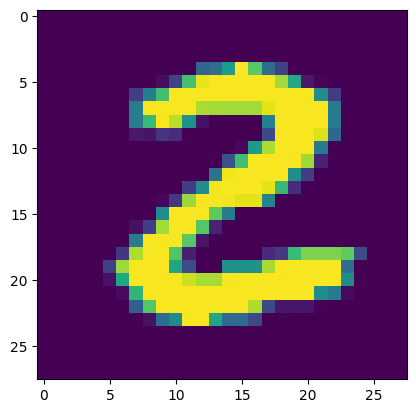

2


In [4]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

In [5]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [7]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

/home/anish/Desktop/DL/DL-Codes/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-06 19:12:34.701781: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9370 - loss: 0.2190 - val_accuracy: 0.9415 - val_loss: 0.1963
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9431 - loss: 0.1966 - val_accuracy: 0.9467 - val_loss: 0.1758
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9491 - loss: 0.1755 - val_accuracy: 0.9508 - val_loss: 0.1679
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9539 - loss: 0.1606 - val_accuracy: 0.9523 - val_loss: 0.1585
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9570 - loss: 0.1500 - val_accuracy: 0.9552 - val_loss: 0.1475


<Axes: >

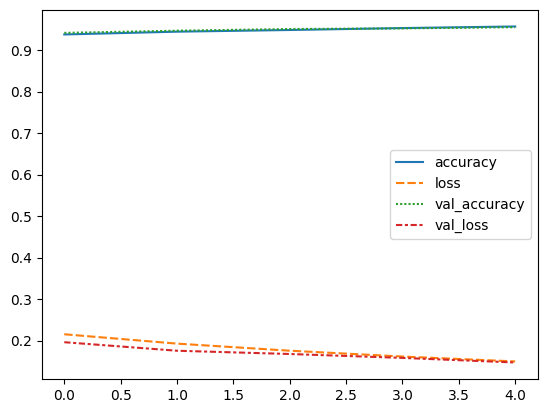

In [18]:
import seaborn as sns
sns.lineplot(model.history.history)

In [19]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9465 - loss: 0.1706


In [20]:
accuracy

0.9552000164985657

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


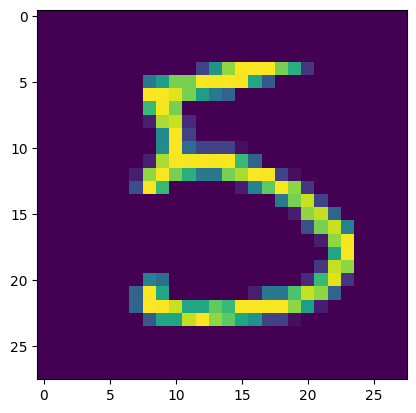

5


In [21]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))